In [6]:
# Merge list of lists

import itertools
a = [["a","b"], ["c"]]
print(list(itertools.chain.from_iterable(a)))

['a', 'b', 'c']


Useful links:
- https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e
- https://towardsdatascience.com/anomaly-detection-with-isolation-forest-visualization-23cd75c281e2

Points <br/>
- Isolation Forest explicitly identifies anomalies instead of profiling normal data points.
- Built on basis of decition trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.
- A normal point requires more partitions to be identified than an abnormal point


Each observation is given an anomaly score and the following decision can be made on its basis:
- Score close to 1 indicates anomalies
- Score much smaller than 0.5 indicates normal observations
- If all scores are close to 0.5 than the entire sample does not seem to have clearly distinct anomalies

One thing worth noting is the contamination parameter, which specifies the percentage of observations we believe to be outliers (scikit-learn’s default value is 0.1)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [2]:
# fit the model
clf = IsolationForest(max_samples=100,
                      random_state=42, contamination=0.01)

clf.fit(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
        max_samples=100, n_estimators=100, n_jobs=1, random_state=42,
        verbose=0)

Text(0.5,1,'IsolationForest')

(-5.0, 5.0, -5.0, 5.0)

(-5, 5)

(-5, 5)

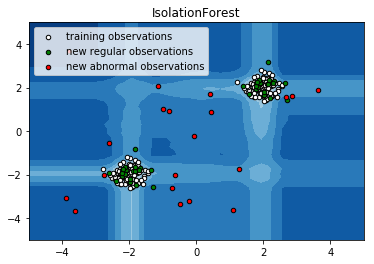

In [3]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()